# Ajustes de hiperparâmetros

Vamos ver como ajustar usando:
    
   - **Grid Search**
   - **Random Search**
   - **Bayesian Search**
   
Nosso foco é apresentar métodos de otimização de hiperparâmetros então não iremos nos preocupar em tratamento dos dados, está disponibilizado o dataframe junto com o notebook no github.

## Bibliotecas

In [11]:
import pandas as pd

## Coleta de dados

In [12]:
df = pd.read_csv('dftratado.csv', sep = ',')

In [13]:
df

,target_default,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,n_bankruptcies,...,n8,n2,dfa,n10,n0,n7,nim,n4,c1,n9
0,0,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,1,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,0,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0,500.0,98.474289,0.532539,118.126207,0.18,0.0,60011.29,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,300.0,101.837040,0.915389,90.711273,0.44,61055.0,75024.28,0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27163,0,210.0,99.166412,0.986355,110.285563,0.30,0.0,80023.21,0,0.0,...,0,0,0,0,0,0,0,0,0,0
27164,0,250.0,96.385996,0.009482,104.824116,0.14,10431.0,70027.75,0,0.0,...,0,0,0,0,0,0,0,0,0,1
27165,0,620.0,92.087698,0.456206,111.333512,0.18,0.0,35020.43,0,0.0,...,0,0,0,0,1,0,0,1,0,0
27166,0,280.0,96.379531,0.416693,103.667082,0.17,10627.0,100013.24,0,0.0,...,0,0,0,0,1,1,0,1,0,0


## Separação treino e teste

In [52]:
X = df.drop('target_default',  axis=1)
y = df[['target_default']]

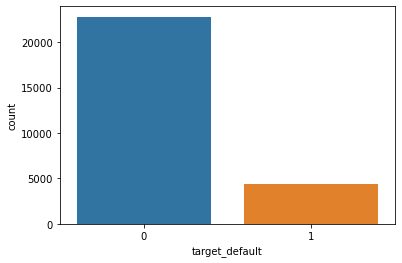

0    22783
1     4385
Name: target_default, dtype: int64

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x =df['target_default'])
plt.show()
df['target_default'].value_counts()

### Balanceamento de classe com SMOTE

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=40)
X, y = sm.fit_resample(X, y)

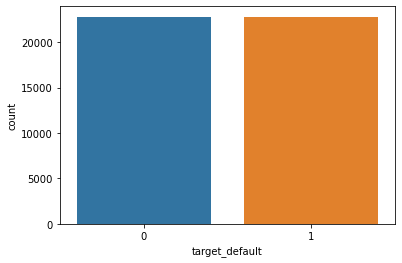

0    22783
1    22783
Name: target_default, dtype: int64

In [56]:
sns.countplot(x =y.target_default)
plt.show()
y.target_default.value_counts()

In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_treino, X_test, y_treino, y_test = train_test_split(X, y)

# Vamos treinar sem o tunning

In [58]:
from sklearn.ensemble import RandomForestClassifier
# Instanciando o classificador para todos
rfc = RandomForestClassifier(random_state=42)

In [66]:
import numpy as np
from numpy import std

cv = KFold(n_splits=5, random_state=1, shuffle=True)

# alguns classificadores nao aceitam y_treino como uma matriz, e mostra erro
# por isso usei np.ravel() para corrigir
scores = cross_val_score(rfc, X_treino, np.ravel(y_treino), scoring='accuracy', cv=cv, n_jobs=1)

acc= mean(scores)*100
std_value = std(scores)

# std é o Standard Deviation (desvio padrão)
# O desvio padrão é um número que descreve a dispersão dos valores.
# Um desvio padrão baixo significa que a maioria dos números está próxima do valor médio (média).
# Um desvio padrão alto significa que os valores estão espalhados por uma faixa mais ampla.

print(f'Acurácia s/tunning: {acc:.2f}% e desvio padrão de acurácia de {std_value:.4f}')


Acurácia s/tunning: 87.32% e desvio padrão de acurácia de 0.0076


# 1. Usando Grid search

In [20]:
# note que o proprio GridSearch ja faz o CV
from sklearn.model_selection import GridSearchCV

# definindo hiperparametros pra testes do random forest
# grid vai rodar todas as combinações 1x2x2x2x2x2= 32 x 5cv
grid_params = {'bootstrap': [True], 
               'max_depth': [6, 10], # tamanho da arvore
               'max_features': ['auto', 'sqrt'], # features auto ou raiz
               'min_samples_leaf': [3, 5], # numero de folhas das arvores
               #'min_samples_split': [4, 6], #splits de 4 ou 6 divisões
               #'n_estimators' : [100, 350] # numero de estimadores
              }

rfc_grid = GridSearchCV(rfc, grid_params, cv=5, scoring="accuracy", 
                       return_train_score=True, verbose=True, n_jobs=1)

rfc_grid.fit(X_treino, y_treino)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [6, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 5]},
             return_train_score=True, scoring='accuracy', verbose=True)

### - Mostrando melhor estimador

In [21]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=42)

### - Mostrando melhores parâmetros

In [22]:
rfc_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3}

### - Melhor score

In [23]:
print('Acurácia com Grid: %.2f' % (rfc_grid.best_score_*100))

Acurácia com Grid: 82.36


# 2. Usando Random search

In [24]:
# note que o proprio randomizedSearch ja faz o CV
from sklearn.model_selection import RandomizedSearchCV

random_params = {'bootstrap': [True], 
               'max_depth': [8, 10, 12], # tamanho da arvore
               'max_features': ['auto', 'sqrt', 'log2'], # features auto ou raiz
               'min_samples_leaf': [2, 3, 4], # numero de folhas das arvores
               'min_samples_split': [2, 3, 4], #splits de 4 ou 6 divisões
               'n_estimators' : [200, 300, 400, 500, 600, 700] # numero de estimadores
              }

rfc_random = RandomizedSearchCV(rfc, random_params, cv=5, scoring="accuracy", 
                       n_iter=32, verbose=True, n_jobs=1)

rfc_random.fit(X_treino, y_treino)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=32, n_jobs=1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [8, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700]},
                   scoring='accuracy', verbose=True)

### - Mostrando melhor estimador

In [25]:
rfc_random.best_estimator_

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=400, random_state=42)

### - Mostrando melhores parâmetros

In [26]:
rfc_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 12,
 'bootstrap': True}

### - Melhor score

In [27]:
print('Acurácia com Random: %.2f' % (rfc_random.best_score_*100))

Acurácia com Random: 83.97


# 3. Usando Bayesian search
No bayesian ele vai usar os valores como intervalos, ou seja vai pegar valores 'entre' o que foi definido. 

In [28]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

bayes_params = {'bootstrap': Categorical([True, False]), 
               'max_depth': Integer(6, 10), # tamanho da arvore
               'max_features': Categorical(['auto', 'sqrt', 'log2']), # features auto ou raiz
               'min_samples_leaf': Integer(2, 10), # numero de folhas das arvores
               'min_samples_split': Integer(2, 10), #splits de 4 ou 6 divisões
               'n_estimators' : Integer(100, 500) # numero de estimadores
              }

rfc_baye =  BayesSearchCV(rfc, bayes_params, cv=5, scoring="accuracy", 
                       n_iter=32, n_jobs=1)

rfc_baye.fit(X_treino, y_treino)


BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=32, scoring='accuracy',
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'max_depth': Integer(low=6, high=10, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('auto', 'sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

### - Mostrando melhor estimador

In [29]:
rfc_baye.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=42)

### - Mostrando melhores parâmetros

In [30]:
rfc_baye.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 10),
             ('max_features', 'log2'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 2),
             ('n_estimators', 500)])

### - Melhor score

In [31]:
print('Acurácia com Bayesian: %.2f' % (rfc_baye.best_score_*100))

Acurácia com Bayesian: 83.03


# Resumo da ópera
O modelo sem tunnig conseguiu pegar as melhores configurações de hiperparametros, se mostrando mais eficaz que os modelos tunados 

In [65]:
print(f'Acurácia s/tunning: {acc:.2f}% e desvio padrão de acurácia de {std_value:.4f}')
print('Acurácia com Grid: %.2f' % (rfc_grid.best_score_*100))
print('Acurácia com Random: %.2f' % (rfc_random.best_score_*100))
print('Acurácia com Bayesian: %.2f' % (rfc_baye.best_score_*100))


Acurácia s/tunning: 87.32% e desvio padrão de acurácia de 0.0076
Acurácia com Grid: 82.36
Acurácia com Random: 83.97
Acurácia com Bayesian: 83.03
